/home/frederik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


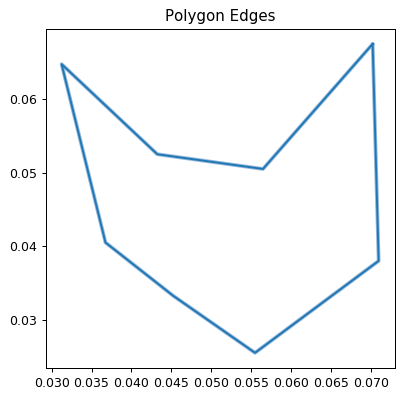

In [11]:
from stl import mesh

from mpl_toolkits import mplot3d
from matplotlib import pyplot as plt
import numpy as np
from numpy import random
from shapely.geometry import Polygon
from numpy.random import random
from numpy.random import randint
from scipy.spatial import Delaunay
from scipy import interpolate
from datetime import datetime
plot=True


high=100
low=50
low2=50
%matplotlib inline
a=randint(low,high)
b=randint(low,high)
c=randint(0,low2)
d=randint(0,low2)
g=randint(low,high)
h=randint(low,high)
e=randint(0,low2)
f=randint(0,low2)
i=randint(low,high)
j=randint(low,high)
k=randint(0,low2)
l=randint(0,low2)

m=randint(low,high)
n=randint(low,high)
o=randint(0,low2)
p=randint(0,low2)

q=randint(0,1)
r=randint(0,1)


vertices =(0.1+(1/2000* np.array([\
    [a,b],
    [c,d],
    [-e,f],
    [-g,h],
    [-i,-l],
    [-k,-j],
    [o,-n],
    [m,-p]
    ])))/2


polygon = Polygon(vertices)
#polygon.area
if plot==True:
    fig = plt.figure(1, figsize=(5,5), dpi=90)
    x,y = polygon.exterior.xy
    ax = fig.add_subplot(111)
    ax.plot(x, y, color='#6699cc', alpha=0.7,
        linewidth=3, solid_capstyle='round', zorder=2)
    ax.set_title('Polygon')

    ax = fig.add_subplot(111)
    ax.plot(x, y)
    ax.set_title('Polygon Edges')

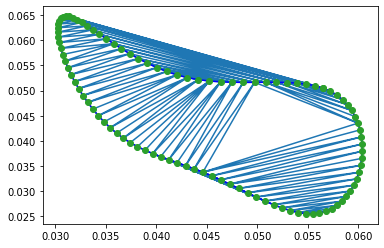

In [12]:

X=vertices[1:,0]
Y=vertices[1:,1]


#tck, u = interpolate.splprep([X, Y], s=0.0)
unew = np.arange(0, 1.01, 0.01)
#out = interpolate.splev(unew, tck)
tck, u = interpolate.splprep([X, Y], s=0, per=True)
out = interpolate.splev(unew, tck)

plt.figure()
plt.plot(out[0], out[1], 'b')


OUT=np.asarray(out)
OUT=np.transpose(OUT)
points=OUT
polygon = Polygon(points)
x,y = polygon.exterior.xy
SplineArea=polygon.area
SplineLength=polygon.length
#points=np.array(,b])
tri = Delaunay(points)
plt.triplot(points[:,0], points[:,1], tri.simplices.copy())
plt.plot(points[:,0], points[:,1], 'o')
plt.show()


In [13]:
SplineDescr="A_%.2f_L%.2f" % (SplineArea,SplineLength)
from datetime import datetime
import glob
time=datetime.today().strftime('%Y-%m-%d-%H:%M')
u=str(len(glob.glob('Models/*.stl'))+1)

ModelName="No"+u+"_"+SplineDescr
ModelName=ModelName.replace(".","-")
ModelName=ModelName+".stl"
ModelName

'No7_A_0-00_L0-11.stl'

<IPython.core.display.Javascript object>


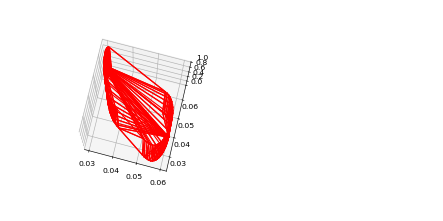

<IPython.core.display.Javascript object>


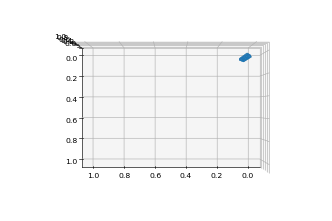

/home/frederik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead


In [14]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
%matplotlib notebook
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
#%matplotlib inline
import stl

points2=np.zeros((len(points[:,0]),2))
points2=np.append(points,points,axis=0)
zeros=np.zeros((len(points),1))
ones=np.ones((len(points),1))
height=np.append(zeros,ones,axis=0)
height.shape
points3=np.append(points2,height,axis=1)

tri = Delaunay(points3)
#tri.vertices
points3.shape


hull = ConvexHull(points3)
fig = plt.figure(figsize=plt.figaspect(0.5))

ax1 = fig.add_subplot(1, 2, 1,projection='3d')


edges= zip(*points3)
for i in hull.simplices:
    ax1.plot(points3[i,0], points3[i,1], points3[i,2], 'r-')

x_all = np.hstack(hull.points[:,0])
y_all = np.hstack(hull.points[:,1])
z_all=np.hstack(hull.points[:,2])
data = np.zeros(len(hull.simplices),dtype=mesh.Mesh.dtype)
m = mesh.Mesh(data, remove_empty_areas=False)
m.x[:] = x_all[hull.simplices]
m.y[:] = y_all[hull.simplices]
m.z[:]=z_all[hull.simplices]
m.save(ModelName,mode=stl.Mode.ASCII)

# Create a new plot
figure = plt.figure()
axes = mplot3d.Axes3D(figure)

# Load the STL files and add the vectors to the plot
your_mesh = mesh.Mesh.from_file(ModelName)
axes.add_collection3d(mplot3d.art3d.Poly3DCollection(your_mesh.vectors))

# Auto scale to the mesh size
scale = your_mesh.points.flatten(-1)
axes.auto_scale_xyz(scale, scale, scale)
axes.view_init(90, 90)
# Show the plot to the screen
plt.show()



In [ ]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
%matplotlib notebook
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
#%matplotlib inline


points2=np.zeros((len(points[:,0]),2))
points2=np.append(points,points,axis=0)
zeros=np.zeros((len(points),1))
ones=np.ones((len(points),1))
height=np.append(zeros,ones,axis=0)
height.shape
points3=np.append(points2,height,axis=1)

tri = Delaunay(points3)
#tri.vertices
points3.shape


hull = ConvexHull(points3)
fig = plt.figure(figsize=plt.figaspect(0.5))

ax1 = fig.add_subplot(1, 2, 1,projection='3d')


edges= zip(*points3)
for i in hull.simplices:
    ax1.plot(points3[i,0], points3[i,1], points3[i,2], 'r-')

#ax.plot(edges[0],edges[1],edges[2],'bo') 

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.set_xlim3d(-5,5)
ax.set_ylim3d(-5,5)
ax.set_zlim3d(-5,5)

plt.show()

In [23]:
import stl
x_all = np.hstack(hull.points[:,0])
y_all = np.hstack(hull.points[:,1])
z_all=np.hstack(hull.points[:,2])
data = np.zeros(len(hull.simplices),dtype=mesh.Mesh.dtype)
m = mesh.Mesh(data, remove_empty_areas=False)
m.x[:] = x_all[hull.simplices]
m.y[:] = y_all[hull.simplices]
m.z[:]=z_all[hull.simplices]
m.save(ModelName,mode=stl.Mode.ASCII)
# Create a new plot
figure = plt.figure()
axes = mplot3d.Axes3D(figure)
axes.view_init(0,90)
# Render the cube
axes.add_collection3d(mplot3d.art3d.Poly3DCollection(m.vectors))

# Auto scale to the mesh size
scale = m.points.flatten(-10)
axes.auto_scale_xyz(scale, scale, scale)

# Show the plot to the screen
plt.show()

(202, 3)

In [ ]:




# Create a new plot
figure = plt.figure()
axes = mplot3d.Axes3D(figure)

# Load the STL files and add the vectors to the plot
your_mesh = mesh.Mesh.from_file(ModelName)
axes.add_collection3d(mplot3d.art3d.Poly3DCollection(your_mesh.vectors))

# Auto scale to the mesh size
scale = your_mesh.points.flatten(-1)
axes.auto_scale_xyz(scale, scale, scale)
axes.view_init(90, 90)
# Show the plot to the screen
plt.show()

Text(0.5, 1.0, 'triplot of Delaunay triangulation')

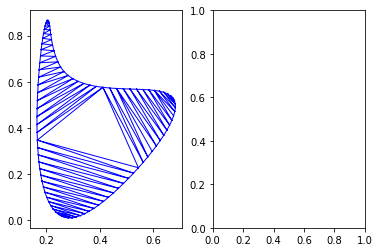

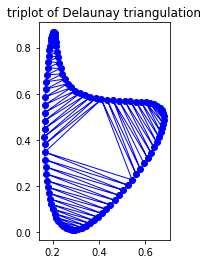

In [2]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np
from shapely.geometry import Polygon as sPolygon
triang = tri.Triangulation(points[:,0], points[:,1])
outline = sPolygon(zip(points[:,0], points[:,1]))
mask = [
    not outline.contains(sPolygon(zip(points[tri,0], points[tri,1])))
    for tri in triang.get_masked_triangles()
]
#figure = plt.figure(ax1)
triang.set_mask(mask)
fig, (ax1,ax2) = plt.subplots(ncols=2)
ax1.triplot(triang, 'b-', lw=1, zorder=3, label='inner')
fig1, ax1 = plt.subplots()
ax1.set_aspect('equal')
ax1.triplot(triang, 'bo-', lw=1)
ax1.set_title('triplot of Delaunay triangulation')
#triang.triangles

/home/frederik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead


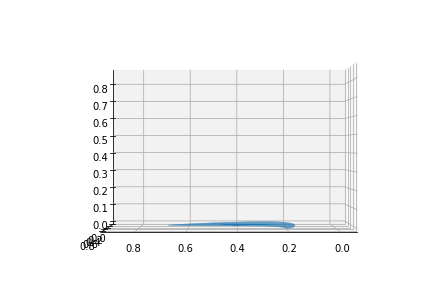

In [3]:
import stl
x_all = np.hstack(points[:,0])
y_all = np.hstack(points[:,1])
z_all=np.hstack(points[:,1]*0)
data = np.zeros(len(triang.get_masked_triangles()), dtype=mesh.Mesh.dtype)
m = mesh.Mesh(data, remove_empty_areas=False)
m.x[:] = x_all[triang.get_masked_triangles()]
m.y[:] = y_all[triang.get_masked_triangles()]
m.z[:]=z_all[triang.get_masked_triangles()]
m.save('model.stl',mode=stl.Mode.ASCII)
# Create a new plot
figure = plt.figure()
axes = mplot3d.Axes3D(figure)
axes.view_init(0,90)
# Render the cube
axes.add_collection3d(mplot3d.art3d.Poly3DCollection(m.vectors))

# Auto scale to the mesh size
scale = m.points.flatten(-10)
axes.auto_scale_xyz(scale, scale, scale)

# Show the plot to the screen
plt.show()


/home/frederik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead
  # Remove the CWD from sys.path while we load stuff.


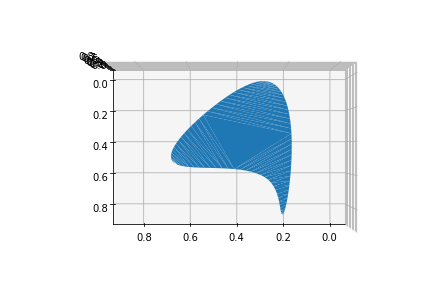

In [4]:
# Create a new plot
figure = plt.figure()
axes = mplot3d.Axes3D(figure)

# Load the STL files and add the vectors to the plot
your_mesh = mesh.Mesh.from_file('model.stl')
axes.add_collection3d(mplot3d.art3d.Poly3DCollection(your_mesh.vectors))

# Auto scale to the mesh size
scale = your_mesh.points.flatten(-1)
axes.auto_scale_xyz(scale, scale, scale)
axes.view_init(90, 90)
# Show the plot to the screen
plt.show()

In [5]:
import numpy as np
from stl import mesh

# Define the 8 vertices of the cube
vertices = +0.1*np.array([\
    [-2, -2, -1],
    [+2, -2, -1],
    [+2, +2, -1],
    [-2, +2, -1],
    [-2, -2, +1],
    [+2, -2, +1],
    [+2, +2, +1],
    [-2, +2, +1]])
# Define the 12 triangles composing the cube
faces = np.array([\
    [0,3,1],
    [1,3,2],
    [0,4,7],
    [0,7,3],
    [4,5,6],
    [4,6,7],
    [5,1,2],
    [5,2,6],
    [2,3,6],
    [3,7,6],
    [0,1,5],
    [0,5,4]])

# Create the mesh
cube = mesh.Mesh(np.zeros(faces.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
    for j in range(3):
        cube.vectors[i][j] = vertices[f[j],:]

# Write the mesh to file "cube.stl"
cube.save('model.stl')


/home/frederik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead
  # Remove the CWD from sys.path while we load stuff.


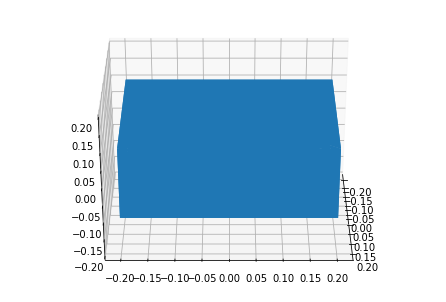

In [48]:
# Create a new plot
figure = plt.figure()
axes = mplot3d.Axes3D(figure)

# Load the STL files and add the vectors to the plot
your_mesh = mesh.Mesh.from_file('model.stl')
axes.add_collection3d(mplot3d.art3d.Poly3DCollection(your_mesh.vectors))

# Auto scale to the mesh size
scale = your_mesh.points.flatten(-1)
axes.auto_scale_xyz(scale, scale, scale)
axes.view_init(30, 0)
# Show the plot to the screen
plt.show()

In [200]:
len(points[:,0])

101

In [203]:

#test.shape
import matplotlib.tri as mtri
#tri = Delaunay(points)
points2=np.zeros((len(points[:,0]),2))
points2=np.append(points,points,axis=0)
tri3=mtri.Triangulation(points2[:,0], points2[:,1])
points2.shape
#points[:,2]=0


(202, 2)

<IPython.core.display.Javascript object>


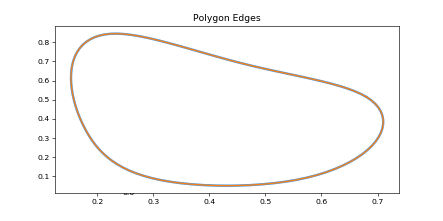

In [276]:
len(hull.simplices)

336

<IPython.core.display.Javascript object>


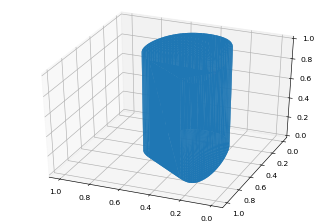

/home/frederik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead


In [284]:
import stl
x_all = np.hstack(hull.points[:,0])
y_all = np.hstack(hull.points[:,1])
z_all=np.hstack(hull.points[:,2])
data = np.zeros(len(hull.simplices),dtype=mesh.Mesh.dtype)
m = mesh.Mesh(data, remove_empty_areas=False)
m.x[:] = x_all[hull.simplices]
m.y[:] = y_all[hull.simplices]
m.z[:]=z_all[hull.simplices]
m.save('model.stl',mode=stl.Mode.ASCII)
# Create a new plot
figure = plt.figure()
axes = mplot3d.Axes3D(figure)
axes.view_init(0,90)
# Render the cube
axes.add_collection3d(mplot3d.art3d.Poly3DCollection(m.vectors))

# Auto scale to the mesh size
scale = m.points.flatten(-10)
axes.auto_scale_xyz(scale, scale, scale)

# Show the plot to the screen
plt.show()



<IPython.core.display.Javascript object>


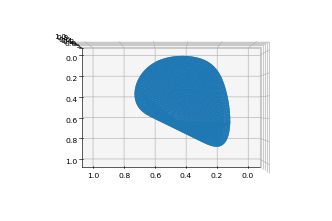

/home/frederik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead
  # Remove the CWD from sys.path while we load stuff.


In [285]:
# Create a new plot
figure = plt.figure()
axes = mplot3d.Axes3D(figure)

# Load the STL files and add the vectors to the plot
your_mesh = mesh.Mesh.from_file('model.stl')
axes.add_collection3d(mplot3d.art3d.Poly3DCollection(your_mesh.vectors))

# Auto scale to the mesh size
scale = your_mesh.points.flatten(-1)
axes.auto_scale_xyz(scale, scale, scale)
axes.view_init(90, 90)
# Show the plot to the screen
plt.show()

IndexError: index 166 is out of bounds for axis 0 with size 101